In [1]:
#14 Terrorism
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import string
%matplotlib inline

In [57]:
#loading excel file and creating a data frame
df = pd.read_excel('RAND.xls')

In [58]:
#looking at data tyoes of columns
df.dtypes

Year                   int64
Month                  int64
Day                    int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
SDelay               float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [4]:
#describing the data
df.describe()

,Small/Sporty/Compact/Large_Sedan,Sports_Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail_Price,Dealer_Cost,Engine_Size,Cyl,HP,City_MPG,Hwy_MPG,Weight,Wheel_Base,Len,Width
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.575540,0.117506,0.134293,0.069544,0.045564,0.057554,0.215827,0.263789,32983.697842,30204.405276,3.200959,5.784173,216.645084,19.342926,25.952038,3558.033573,107.642686,173.738609,66.434053
std,0.494855,0.322409,0.341376,0.254683,0.208787,0.233178,0.411889,0.441216,19569.358188,17768.464325,1.097856,1.625056,71.712693,6.335940,7.465794,780.701899,11.152328,46.804537,18.399313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10280.000000,9875.000000,1.300000,-1.000000,73.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20445.000000,18973.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3109.000000,103.000000,175.000000,68.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27905.000000,25672.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3473.000000,107.000000,184.000000,71.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39250.000000,35992.000000,3.900000,6.000000,255.000000,21.000000,29.000000,3966.000000,112.000000,192.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,80.000000


In [5]:
#looking at the shape of the data
df.shape

(417, 20)

In [52]:
#create year column from the date column
#this will allow us to group the data by year in order to get annual stats
df['Year'] = df['Date'].dt.year

KeyError: 'Date'

In [40]:
#>>>
#tryout a different dataset
import numpy as np
import random
df['Year'] = pd.DataFrame(np.random.randint(1985, 2016, len(df)))

In [ ]:
#creat a count column from recording the number of terrorist attacks when 
#grouping by another variable
df['Number of Terrorist Attacks'] = 1

In [41]:
df.head(10)

,Vehicle_Name,Small/Sporty/Compact/Large_Sedan,Sports_Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail_Price,...,Engine_Size,Cyl,HP,City_MPG,Hwy_MPG,Weight,Wheel_Base,Len,Width,Year
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,...,3.5,6,225,18,24,3880,115,197,72,2006
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,...,3.5,6,225,18,24,3893,115,197,72,1992
2,Acura MDX,0,0,1,0,0,0,1,0,36945,...,3.5,6,265,17,23,4451,106,189,77,2015
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,...,3.2,6,290,17,24,3153,100,174,71,2008
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,...,2.0,4,200,24,31,2778,101,172,68,2013
5,Acura TL 4dr,1,0,0,0,0,0,0,0,33195,...,3.2,6,270,20,28,3575,108,186,72,2010
6,Acura TSX 4dr,1,0,0,0,0,0,0,0,26990,...,2.4,4,200,22,29,3230,105,183,69,2001
7,Audi A4 1.8T 4dr,1,0,0,0,0,0,0,0,25940,...,1.8,4,170,22,31,3252,104,179,70,2003
8,Audi A4 3.0 4dr,1,0,0,0,0,0,0,0,31840,...,3.0,6,220,20,28,3462,104,179,70,2009
9,Audi A4 3.0 convertible 2dr,1,0,0,0,0,0,0,0,42490,...,3.0,6,220,20,27,3814,105,180,70,1995


In [42]:
#calculating the sum of column variable stats: ignore the summary stats 
#for the year variable
df.sum()

Vehicle_Name                        Acura 3.5 RL 4drAcura 3.5 RL w/Navigation 4drA...
Small/Sporty/Compact/Large_Sedan                                                  240
Sports_Car                                                                         49
SUV                                                                                56
Wagon                                                                              29
Minivan                                                                            19
Pickup                                                                             24
AWD                                                                                90
RWD                                                                               110
Retail_Price                                                                 13754202
Dealer_Cost                                                                  12595237
Engine_Size                                           

In [ ]:
df.tail()

In [43]:
#grouping the original data frame by year and the summing other
#columns for each year
ts = df.groupby('Year').sum()

In [44]:
ts.head(10)

,Small/Sporty/Compact/Large_Sedan,Sports_Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail_Price,Dealer_Cost,Engine_Size,Cyl,HP,City_MPG,Hwy_MPG,Weight,Wheel_Base,Len,Width
Year,,,,,,,,,,,,,,,,,,,
1985,13,1,1,2,0,0,4,4,569670,524879,53.0,101,3690,351,479,58902,1811,3139,1204
1986,9,2,1,1,1,1,3,3,420873,387293,45.9,82,3040,277,379,51883,1603,2592,997
1987,5,2,3,1,2,3,6,3,512634,466400,61.0,104,3700,260,364,64984,1842,2520,957
1988,7,2,0,0,0,1,0,8,351344,322593,34.7,62,2282,183,237,35946,1122,1684,637
1989,8,2,2,3,2,0,7,3,571119,520090,59.4,106,3802,325,444,63835,1861,3223,1216
1990,9,3,0,0,0,0,1,6,456234,418420,38.4,71,2757,207,289,42338,1283,2241,855
1991,9,3,2,1,1,0,2,3,469663,426852,43.3,84,3098,341,437,53171,1701,2931,1125
1992,8,4,1,2,1,2,7,4,594498,541971,55.0,100,3856,344,460,62986,1912,2857,1121
1993,10,0,4,1,1,1,5,5,547047,502907,53.4,100,3593,347,459,60883,1833,2947,1140


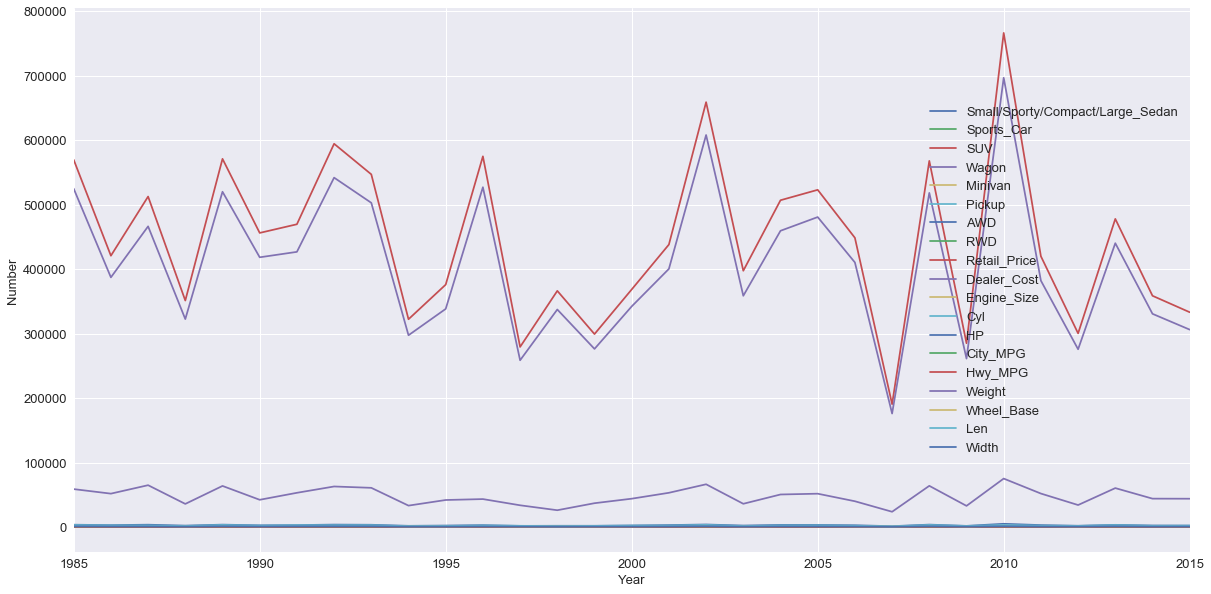

In [45]:
#creating a time series that displays Injuries, Fatallities, and
#Number fo Terrorist Attacks yearly from 1968 to 2009
ax = ts.plot(figsize=(20, 10), fontsize=13); plt.legend(loc='best', fontsize=13)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number', fontsize=13)

In [ ]:
#create monthly stats for the original data frame
#this will allow us to create monthly stats for other columns
df['']

In [ ]:
#create monthly stats
monthly = df.groupby(['Month']).sum()
monthly = monthly.drop('Year', axis=1)

In [ ]:
#show monthly stats
monthly.head(20)

In [48]:
#calculate the number of months between 1968 and 2009
((2009-1968)+1)*12

504

In [ ]:
#create a time series that displays Injuries , Fatalities, and number of
#Terrorist Attacks monthly from 1968-2009
ax = monthly.plot(figsize=(20,10), fontsize=13, legend=False)
plt.legend(loc='best', fontsize=13)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Numebr', fontsize=13)

In [ ]:
#we have some spikes; lets locate them
dat = monthly.ix[(monthly['Fatalities'] > 1000) | (monthly['Injuries'] > 2000)]
dat.plot(kind='bar', figsize=(10,6), stacked=False,
         title='Top Deadly Months of Terrorists Attacks')

In [ ]:
#what about the most deadly terrorist attacks?
inter = df.ix[df['Fatalities'] >= 500]
inter

In [ ]:
#calculating the total percentage Fatalities as a total number of
#Cassulties
monthly['Fatalities Percent'] = (monthly['Fatalities']/
                                 (monthly['Fatalities'] + monthly['Injuries'])) * 100
monthly['Fatalities Percent'].fillna(0).head(20)

In [ ]:
#calculating the total percentage Fatalities as a total number of
#Cassulties
df['Fatalities Percent'] = (df['Fatalities']/
                                 (df['Fatalities'] + df['Injuries'])) * 100
df['Fatalities Percent'] = df['Fatalities Percent'].fillna(0)
df['Fatalities Percent'].head(20)

In [ ]:
#grouping by year to get yearly stats for original data frame
total = df.groupby('Year')
total = total.mean()

In [ ]:
total

In [ ]:
#plotting yearly Fatality Percent
ax = total['Fatalities Percent'].plot(figsize=(20,10), fontsize=13)
plt.legend(loc='best', fontsize=13)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percent', fontsize=13)

In [53]:
#create a new data frame called dayint
dayint = df

In [ ]:
#creat a new column in dayint with unique days of the year for each
#Terrorism Attack
dayint['Day'] = dayint['Date'].dt.dayofyear
dayint['Day'].head(20)

In [59]:
#groupby each unique day of the year and sum remaining variables
dayint = dayint.groupby('Day').sum()

KeyError: 'Day'

In [ ]:
dayint.head(20)

In [ ]:
#plot attacks by unique day of the year
ax = dayint['Number fo Terrorist Attacks'].plot(figsize=(20, 10), fontsize=13)
ax.set_xlabel('Unique Day of the Year', fontsize=13)
ax.set_ylabel('Number of Terrorist Attacks', fontsize=13)

In [ ]:
#top 15 days of the yar in terms of Terrorist Attacks
dayint = dayint.sort_values(by='Number fo Terrorist Attacks', ascending=False)
mostdead = datint.hear(15)
mostdead

In [ ]:
#plot the dealiest days of the year
mostdead['Number fo Terrorist Attacks'].plot(kind='bar', figsize=(10, 6),
                                             stacked=False,
                                             title = 'Deadliest Days')]

In [ ]:
#Calculate the number of unique countries that were attacked for each year
countries = df.groupbhy('Year').Country.nunique()
countries

In [ ]:
#plot unique countries attacked
ax.countries.plot(figsize=(20, 10), fontsize=13)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Unique Countries Attacked', fontsize=13)

In [ ]:
#Using the contains() function to determine attacks on embassies
embatt = pd.DataFrame(df.Description.str.contains('embassy|consulate|mission'),
                      case=False.value_counts())
embatt

In [ ]:
#rename the columns
embatt = embatt.rename(column=('Description':'Number of Attacks'))
embatt

In [ ]:
#rename the index
embatt.index = ['Non-Diplomatic Targest', 'Displomatic Targets']
embatt

In [ ]:
#plot embatt
embatt.plot(kind='bar')

In [ ]:
#creat data frame dfa that contains only terrorist attacks from known group
dfa = df[df.Perpetrator != 'Unknown']
dfa = dfa[df.Perpetrator != 'Other']
dfa

In [ ]:
#using dfa find the top 15 terrorist groups in terms
#of attacks
perp = dfa.groupby('Perpetrator').sum()
terr = perp.sort_values(by='Number of Terrorists Attacks', ascending=False)
terr = terr.head(15)
terr

In [ ]:
#panda series
pd.Series(terr['Number of Terrorists Attacks']).plot(kind='barh', 
                                                     title='Number of Terrorists Attacks')

In [ ]:
#use the dfa data frame to plot the top 15 terrorist groups in terms of
#number of fatalities
fatal = perp.sort_values(by='Fatalities', ascending=False).head(15)
pd.Series(fatal['Fatalities']).plot(kind='barh', title='Fatalities by Terrorism Group')

In [ ]:
'''
Who kill the most?
Who have the most attacks?
'''

In [ ]:
#calculate the number of fatalities from Al Qaeda
data = pd.Series(fatal.loc[['Al Qaeda'],['Fatalities']])
data

In [ ]:
#calculate the percentage of gatalities from Al Qaeda compared to 
#other terrorist groups incleding unknown and other groups
#pie charts
#plt.reParam['font.size']=13
plt.figure(figsize=(5,5))

sizes = [data, df['Fatalities'].sum()-data]
labels = ['Al Qaeda', 'Other Terrorist Groups']
colors = ['Green', 'Red']
plt.pie(sizes, colors = colors, shadow=True, autopct='%0.2f%%', startangle=140) #0.2 decimal points 
plt.legend(labels, bbow_to_anchor=(0.05,0.8), loc='best') #bbow_to_anchor to locate the chart position

In [56]:
dayint.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
SDelay               float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [39]:
'''
a = pd.DataFrame(np.random.randint(1985,2016,size=len(df)))
a.tail()
'''

,0
412,1986
413,1997
414,2002
415,1992
416,2010
